<h1><center>Customer Classification Using K-Nearest Neighborhood.</center></h1>

## **Description:**

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. This is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

## Setup

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns 
sns.set()

## Dataset

The case focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use  K nearest neighbour as a classification.


In [2]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv"

In [3]:
df = pd.read_csv(path)
print(df.shape)
df.head()

(1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## EDA


Let’s see how many of each class is in our data set 

In [4]:
df.custcat.unique()

array([1, 4, 3, 2], dtype=int64)

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

**281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers**


### Data Visualization by Variables.
You can easily explore your data using visualization techniques:

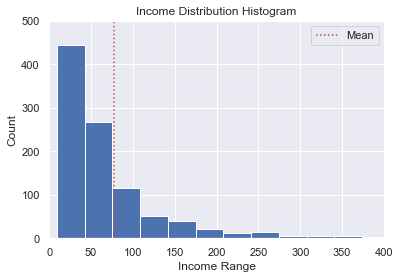

In [6]:
plt.hist(df.income, bins=50)
plt.ylabel('Count')
plt.xlabel('Income Range')
plt.title("Income Distribution Histogram")
plt.axis([0,400,0,500])
plt.vlines(np.mean(df.income),
               ymin=0,
               ymax=500,
               linestyles=":",
               label="Mean",
                color='r')
plt.legend()
plt.show()

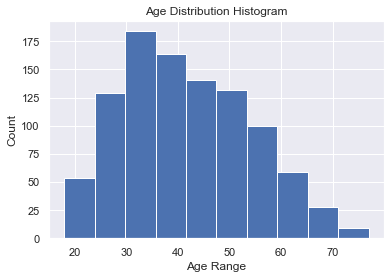

In [7]:
plt.hist(df.age)
plt.ylabel('Count')
plt.xlabel('Age Range')
plt.title("Age Distribution Histogram")
plt.show()

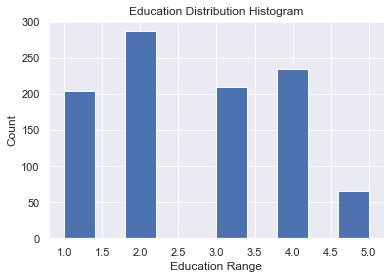

In [8]:
plt.hist(df.ed)
plt.ylabel('Count')
plt.xlabel('Education Range')
plt.title("Education Distribution Histogram")
plt.show()

In [9]:
gender=df.gender.value_counts()
gender

1    517
0    483
Name: gender, dtype: int64

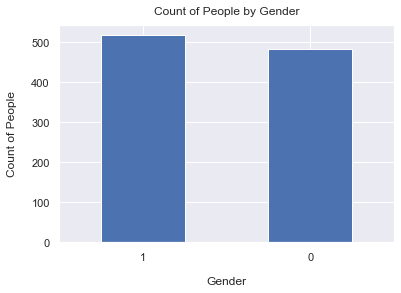

In [10]:
gender.plot(kind='bar', rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People by Gender", y=1.02)
plt.show()

### Data visualization relation between variables.

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

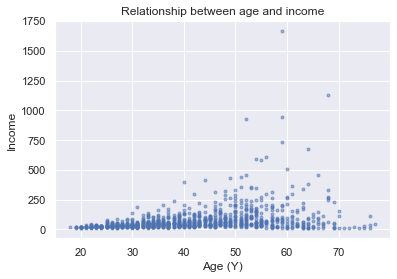

In [12]:
plt.plot(df.age,df.income,'o', markersize=3, alpha=0.5)
plt.ylabel("Income")
plt.xlabel("Age (Y)")
plt.title("Relationship between age and income")
plt.show()

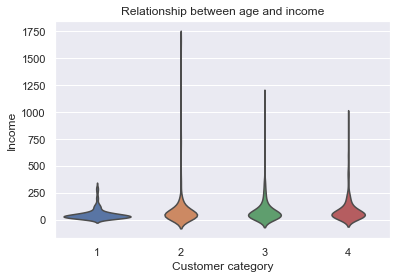

In [13]:
sns.violinplot(x='custcat', y='income', data=df, inner=None)
plt.ylabel("Income")
plt.xlabel("Customer category")
plt.title("Relationship between age and income")
plt.show()

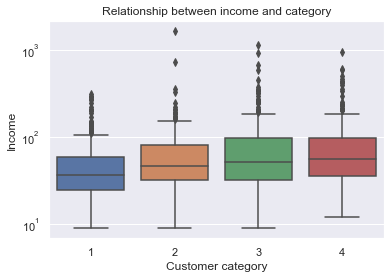

In [14]:
sns.boxplot(x='custcat', y='income', data=df)
plt.ylabel("Income")
plt.xlabel("Customer category")
plt.title("Relationship between income and category")
plt.yscale('log')
plt.show()

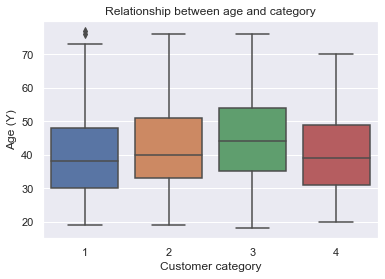

In [15]:
sns.boxplot(x='custcat', y='age', data=df)
plt.ylabel("Age (Y)")
plt.xlabel("Customer category")
plt.title("Relationship between age and category")
plt.show()

### Feature set

Lets define feature sets, X:

In [16]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [17]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?

In [18]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data 

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test Split 


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## K nearest neighbor Classification Model (KNN)

### Import library 

Classifier implementing the k-nearest neighbors vote.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [22]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Predicting

We can use the model to predict the test set:

In [23]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [24]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### Tuning Parameters

Building the model again, but this time with k=6

In [25]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


### What about other K?

We can calculate the accuracy of KNN for different Ks.

In [26]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385,
       0.395, 0.41 , 0.395, 0.395, 0.395, 0.38 , 0.39 , 0.375, 0.365,
       0.38 , 0.375, 0.375, 0.365, 0.36 , 0.36 , 0.365, 0.37 , 0.38 ,
       0.37 , 0.37 , 0.37 , 0.36 , 0.35 , 0.36 , 0.355, 0.36 , 0.36 ,
       0.36 , 0.34 , 0.34 , 0.345, 0.35 , 0.35 , 0.355, 0.365, 0.355,
       0.355, 0.365, 0.37 , 0.37 , 0.37 , 0.35 , 0.35 , 0.35 , 0.35 ,
       0.36 , 0.355, 0.33 , 0.32 , 0.345, 0.345, 0.345, 0.335, 0.345,
       0.355, 0.345, 0.345, 0.34 , 0.34 , 0.335, 0.345, 0.325, 0.315])

## Plot  model accuracy  for Different number of Neighbors 

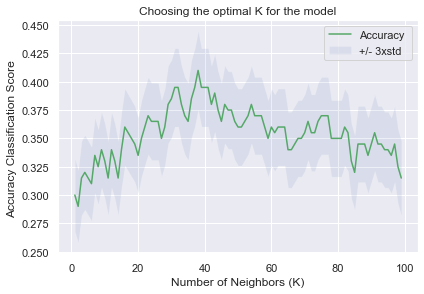

In [27]:
%matplotlib inline
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy Classification Score ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.title("Choosing the optimal K for the model")
plt.savefig("img/knearest.png", dpi=300, bbox_inches='tight')
plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38


## Evaluation Metrics in Classifications
 

## K-Nearest Function

In [29]:
def K_Nearest(df_with_X, df_with_y, test_size_value):
    """"""
    """"""
    from sklearn import metrics
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter
    import pandas as pd
    import numpy as np
    import matplotlib.ticker as ticker
    %matplotlib inline
    X = np.asarray(df_with_X)
    y = np.asarray(df_with_y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size_value, random_state=4)
    
    print("---------------------------")
    print('Train set:', X_train.shape, y_train.shape)
    print('Test set:', X_test.shape, y_test.shape)
    print("---------------------------")
    
    from sklearn.neighbors import KNeighborsClassifier
    Ks = 100
    mean_acc = np.zeros((Ks - 1))
    std_acc = np.zeros((Ks - 1))
    ConfustionMx = []
    for n in range(1, Ks):

        #Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
        std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    
    print("--------Accurancy----------")
    print(mean_acc)

    plt.plot(range(1, Ks), mean_acc, 'g')
    plt.fill_between(range(1, Ks),
                     mean_acc - 1 * std_acc,
                     mean_acc + 1 * std_acc,
                     alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    print("---------------------------")
    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
    # write your code here
    k2 = mean_acc.argmax()+1
    #Train Model and Predict  
    neigh2 = KNeighborsClassifier(n_neighbors = k2).fit(X_train,y_train)
    return neigh2
    print("-------Accurancy Plot---------")
    plt.show()


---------------------------
Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
---------------------------
--------Accurancy----------
[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34  0.33  0.315 0.34
 0.33  0.315 0.34  0.36  0.355 0.35  0.345 0.335 0.35  0.36  0.37  0.365
 0.365 0.365 0.35  0.36  0.38  0.385 0.395 0.395 0.38  0.37  0.365 0.385
 0.395 0.41  0.395 0.395 0.395 0.38  0.39  0.375 0.365 0.38  0.375 0.375
 0.365 0.36  0.36  0.365 0.37  0.38  0.37  0.37  0.37  0.36  0.35  0.36
 0.355 0.36  0.36  0.36  0.34  0.34  0.345 0.35  0.35  0.355 0.365 0.355
 0.355 0.365 0.37  0.37  0.37  0.35  0.35  0.35  0.35  0.36  0.355 0.33
 0.32  0.345 0.345 0.345 0.335 0.345 0.355 0.345 0.345 0.34  0.34  0.335
 0.345 0.325 0.315]
---------------------------
The best accuracy was with 0.41 with k= 38


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

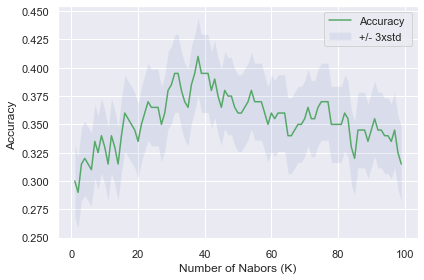

In [30]:
K_Nearest(X, y, 0.2)